In [86]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Download necessary resources
# nltk.download('stopwords')
# nltk.download('wordnet')

In [87]:
# Load the dataset
df = pd.read_csv('R:/IIT_MADRAS_DATA_SCINCE/DataSet/Healthcare Reviews/healthcare_reviews.csv')

In [88]:
df["Review_Text"]

0            I have mixed feelings about my experience. 
1      The staff was caring and attentive. I couldn't...
2            I have mixed feelings about my experience. 
3            I have mixed feelings about my experience. 
4      The healthcare provider was excellent. I had a...
                             ...                        
995    My experience was terrible. I would not recomm...
996    The service was disappointing. I won't be comi...
997      The service was okay, but nothing exceptional. 
998          I have mixed feelings about my experience. 
999    The staff was caring and attentive. I couldn't...
Name: Review_Text, Length: 1000, dtype: object

In [89]:
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [90]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [91]:
df = df.dropna()
df.shape

(900, 2)

In [92]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


# 1. Data Preprocessing

In [93]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

#Apply preprocessing
df['cleaned_review'] = df['Review_Text'].apply(preprocess_text)

# Display sample cleaned data
df[['Review_Text', 'cleaned_review']].head()

,Review_Text,cleaned_review
0,I have mixed feelings about my experience.,mixed feeling experience
1,The staff was caring and attentive. I couldn't...,staff caring attentive couldnt happier
2,I have mixed feelings about my experience.,mixed feeling experience
3,I have mixed feelings about my experience.,mixed feeling experience
4,The healthcare provider was excellent. I had a...,healthcare provider excellent great experience


In [94]:
df['cleaned_review']

0                            mixed feeling experience
1              staff caring attentive couldnt happier
2                            mixed feeling experience
3                            mixed feeling experience
4      healthcare provider excellent great experience
                            ...                      
995      experience terrible would recommend provider
996            service disappointing wont coming back
997                  service okay nothing exceptional
998                          mixed feeling experience
999            staff caring attentive couldnt happier
Name: cleaned_review, Length: 900, dtype: object

In [98]:
df.loc[df['Rating'] > 3, 'Sentiment'] = '1'
df.loc[df['Rating'] == 3, 'Sentiment'] = '0'
df.loc[df['Rating'] < 3, 'Sentiment'] = '-1'

KeyError: 'Rating'

In [97]:
class_counts = df['Sentiment'].value_counts()
print(class_counts)

Sentiment
Sentiment    1
Name: count, dtype: int64


In [85]:
print(df['Sentiment'].value_counts())

Sentiment
Sentiment    1
Name: count, dtype: int64


In [83]:
print(df['Sentiment'].unique())

['Sentiment']


In [84]:
df

,Text,Sentiment
0,cleaned_review,Sentiment


In [82]:
print("Sentiment column values after conversion:")
print(df['Sentiment'].unique())

Sentiment column values after conversion:
['Sentiment']


In [ ]:
from sklearn.utils import resample
import pandas as pd

# Example DataFrame
data = {
    'Text': ['cleaned_review'], 
    'Sentiment': ['Sentiment'] 
}
df = pd.DataFrame(data)


# Separate majority and minority classes
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]
neutral = df[df['Sentiment'] == 0]

# Resample
if len(positive) == 0 and len(neutral) == 0:
    print("Positive or neutral class is empty.Cannot perform resampling")

else:
    neutral_upsampled = resample(neutral, replace=True, n_samples=len(positive), random_state=42)
    balanced_df = pd.concat([positive, negative, neutral_upsampled])

    print("Resampled data distribution:")
    print(balanced_df['Sentiment'].value_counts())




Positive or neutral class is empty.Cannot perform resampling


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Vectorize Text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(balanced_df['Text'])
y = balanced_df['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.41
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        37
           0       0.41      1.00      0.58        82
           1       0.00      0.00      0.00        81

    accuracy                           0.41       200
   macro avg       0.14      0.33      0.19       200
weighted avg       0.17      0.41      0.24       200



c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE

# # Example DataFrame (replace with your actual data)
# data = pd.DataFrame({
#     'Sentiment': [1]*388 + [-1]*365 + [0]*147,
#     'Feature1': range(900),  # Example features
#     'Feature2': range(900, 1800)
# })

# # Features and labels
# X = data[['Feature1', 'Feature2']]
# y = data['Sentiment']

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Handle imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Train a classifier (Random Forest)
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_resampled, y_resampled)

# # Predict on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73
           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        78

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [12]:
df['Sentiment'] = pd.to_numeric(df['Sentiment'])

In [13]:
print(df['Sentiment'].unique())
print(df['Sentiment'].dtype)

[ 1  0 -1]
int64


In [14]:
df.dtypes

Review_Text       object
Rating             int64
cleaned_review    object
Sentiment          int64
dtype: object

In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Vectorizing the text data with TF-IDF and using bigrams and trigrams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Bigrams and trigrams
X_tfidf = vectorizer.fit_transform(df['cleaned_review'])
y = df['Sentiment']

# Shift labels to be non-negative for model compatibility
y_shifted = y.replace({-1: 0, 0: 1, 1: 2})

# Balance the data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y_shifted)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Use XGBoost for model training
xgb_model = xgb.XGBClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

# Use LightGBM for model training
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

# GridSearchCV for LightGBM
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=3, n_jobs=-1, verbose=1)
grid_search_lgb.fit(X_train, y_train)

print(f"Best parameters for LightGBM: {grid_search_lgb.best_params_}")

# Choose the best model from grid search (XGBoost or LightGBM)
best_model = grid_search_xgb.best_estimator_  # Assuming XGBoost is better

# Fit the best model and make predictions on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy on test data: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 68
[LightGBM] [Info] Start training from score -1.132477
[LightGBM] [Info] Start training from score -1.102918
[LightGBM] [Info] Start training from score -1.061708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.utils import resample

# # # Load the dataset
# # df = pd.read_csv('healthcare_reviews.csv')  # Replace with your file path

# # Step 1: Drop duplicate reviews
# df_cleaned = df.drop_duplicates(subset=['Review_Text'], keep='first').dropna(subset=['Review_Text']).reset_index(drop=True)

# # Step 2: Map Rating to Sentiment (if not already mapped)
# def map_rating_to_sentiment(rating):
#     if rating <= 2:
#         return -1
#     elif rating == 3:
#         return 0
#     else:
#         return 1

# df_cleaned['Sentiment'] = df_cleaned['Rating'].apply(map_rating_to_sentiment)

# # Step 3: Check class distribution
# print("Class distribution before balancing:")
# print(df_cleaned['Sentiment'].value_counts())

# # Step 4: Handle imbalance by oversampling minority classes
# df_negative = df_cleaned[df_cleaned['Sentiment'] == -1]
# df_neutral = df_cleaned[df_cleaned['Sentiment'] == 0]
# df_positive = df_cleaned[df_cleaned['Sentiment'] == 1]

# # Target size for each class
# target_size = max(len(df_negative), len(df_neutral), len(df_positive))

# # Oversample each class
# df_negative_upsampled = resample(df_negative, replace=True, n_samples=target_size, random_state=42)
# df_neutral_upsampled = resample(df_neutral, replace=True, n_samples=target_size, random_state=42)
# df_positive_upsampled = resample(df_positive, replace=True, n_samples=target_size, random_state=42)

# # Combine into a balanced dataset
# df_balanced = pd.concat([df_negative_upsampled, df_neutral_upsampled, df_positive_upsampled])

# print("Class distribution after balancing:")
# print(df_balanced['Sentiment'].value_counts())

# # Step 5: Split features and labels
# X_balanced = df_balanced['Review_Text']
# y_balanced = df_balanced['Sentiment']

# # Step 6: TF-IDF Transformation
# tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
# X_tfidf = tfidf.fit_transform(X_balanced)

# # Step 7: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_balanced, test_size=0.2, random_state=42)

# # Step 8: Train Logistic Regression Model
# model = LogisticRegression(max_iter=1000, random_state=42)
# model.fit(X_train, y_train)

# # Step 9: Evaluate Model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# classification = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy * 100:.2f}%")
# print("Classification Report:")
# print(classification)


# Vectorize the Text Data:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned review text
X = vectorizer.fit_transform(df['cleaned_review'])

# Get the sentiment labels (target variable)

y = df['Sentiment']

In [16]:
df

,Review_Text,Rating,cleaned_review,Sentiment
0,I have mixed feelings about my experience.,4,mixed feeling experience,1
1,The staff was caring and attentive. I couldn't...,5,staff caring attentive couldnt happier,1
2,I have mixed feelings about my experience.,5,mixed feeling experience,1
3,I have mixed feelings about my experience.,5,mixed feeling experience,1
4,The healthcare provider was excellent. I had a...,3,healthcare provider excellent great experience,0
...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,experience terrible would recommend provider,1
996,The service was disappointing. I won't be comi...,4,service disappointing wont coming back,1
997,"The service was okay, but nothing exceptional.",3,service okay nothing exceptional,0
998,I have mixed feelings about my experience.,5,mixed feeling experience,1


In [17]:
df[df.duplicated()]

,Review_Text,Rating,cleaned_review,Sentiment
3,I have mixed feelings about my experience.,5,mixed feeling experience,1
9,I have mixed feelings about my experience.,5,mixed feeling experience,1
12,The healthcare provider was excellent. I had a...,3,healthcare provider excellent great experience,0
14,I had a bad experience with this healthcare pr...,2,bad experience healthcare provider avoid possible,-1
20,The staff was caring and attentive. I couldn't...,4,staff caring attentive couldnt happier,1
...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,experience terrible would recommend provider,1
996,The service was disappointing. I won't be comi...,4,service disappointing wont coming back,1
997,"The service was okay, but nothing exceptional.",3,service okay nothing exceptional,0
998,I have mixed feelings about my experience.,5,mixed feeling experience,1


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# Split the data into training and testing sets (80% train, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train,y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy * 100:.2f}%")

# print classification report
print("Classification report")
print(classification_report(y_test,y_pred))

# Print confusion matrix
print("confusion_matrix:")
print(confusion_matrix(y_test,y_pred))


Accuracy:40.00%
Classification report
              precision    recall  f1-score   support

          -1       0.42      0.41      0.41        79
           0       0.00      0.00      0.00        25
           1       0.38      0.53      0.44        76

    accuracy                           0.40       180
   macro avg       0.27      0.31      0.29       180
weighted avg       0.35      0.40      0.37       180

confusion_matrix:
[[32  0 47]
 [ 8  0 17]
 [36  0 40]]


c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV 

# Define the paramater grid search
param_grid = {'C': [1,10,100], 'kernel': ['linear'], 'gamma': ['scale', 'auto']}

# Initialize GreidSearchCV
grid_search = GridSearchCV(SVC(),param_grid, cv=5 ,scoring='accuracy')

# fit the grid search to the training data
grid_search.fit(X_train,y_train)

# get the best parameters and the best estimator
print("Best Parameters:",grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = best_model.predict(X_test)

# print Evaluation metrics for the tuned model 
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test,y_pred_tuned))
print(confusion_matrix(y_test,y_pred_tuned))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Tuned Model Accuracy: 0.42592592592592593
              precision    recall  f1-score   support

          -1       0.46      0.45      0.46       122
           0       0.00      0.00      0.00        34
           1       0.40      0.53      0.45       114

    accuracy                           0.43       270
   macro avg       0.29      0.33      0.30       270
weighted avg       0.38      0.43      0.40       270

[[55  0 67]
 [10  0 24]
 [54  0 60]]


c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Handle Imbalanced Data

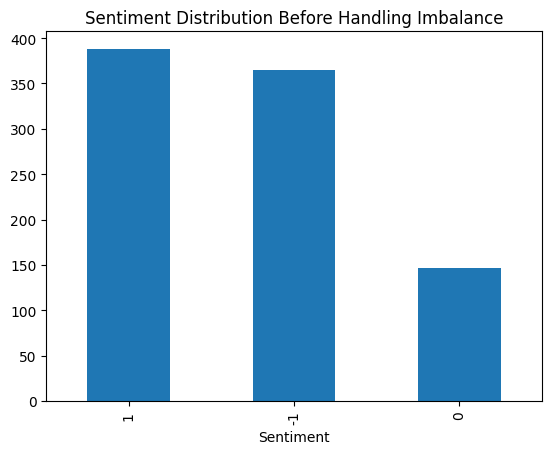

Counter({0: 312, -1: 312, 1: 312})


In [22]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Check original sentiment distribution
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution Before Handling Imbalance')
plt.show()

# Split features and labels
X = df['cleaned_review']
y = df['Sentiment']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print(Counter(y_train_smote))


# Handle imbalance data with ADASYN 

In [23]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler


X = df['cleaned_review'] #feature : cleaned review text
y = df['Sentiment']  #target: sentiment labels

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

#spliting the data intom train and test sets:
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.3,random_state=42)

#Applying ADASYN for oversampling
ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

# Cheking the class distribution after resampling
print(f"Before resampling: {dict(zip(*np.unique(y_train,return_counts=True)))}")
print(f"After resampling: {dict(zip(*np.unique(y_resampled,return_counts=True)))}")

# Training a classifier(RandomForest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled,y_resampled)

#Evalute the model on test set
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

Before resampling: {-1: 243, 0: 113, 1: 274}
After resampling: {-1: 274, 0: 274, 1: 274}
              precision    recall  f1-score   support

          -1       0.45      0.55      0.49       122
           0       0.12      0.44      0.19        34
           1       0.00      0.00      0.00       114

    accuracy                           0.30       270
   macro avg       0.19      0.33      0.23       270
weighted avg       0.22      0.30      0.25       270



c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# handling data imbalance using Gradient Boosting methods like XGBoost, LightGBM, and CatBoost

In [24]:
df['cleaned_review'].shape

(900,)

In [25]:
df['Sentiment'].shape

(900,)

In [26]:
df.dtypes

Review_Text       object
Rating             int64
cleaned_review    object
Sentiment          int64
dtype: object

In [27]:
df.head()

,Review_Text,Rating,cleaned_review,Sentiment
0,I have mixed feelings about my experience.,4,mixed feeling experience,1
1,The staff was caring and attentive. I couldn't...,5,staff caring attentive couldnt happier,1
2,I have mixed feelings about my experience.,5,mixed feeling experience,1
3,I have mixed feelings about my experience.,5,mixed feeling experience,1
4,The healthcare provider was excellent. I had a...,3,healthcare provider excellent great experience,0


In [28]:
df.tail()

,Review_Text,Rating,cleaned_review,Sentiment
995,My experience was terrible. I would not recomm...,5,experience terrible would recommend provider,1
996,The service was disappointing. I won't be comi...,4,service disappointing wont coming back,1
997,"The service was okay, but nothing exceptional.",3,service okay nothing exceptional,0
998,I have mixed feelings about my experience.,5,mixed feeling experience,1
999,The staff was caring and attentive. I couldn't...,4,staff caring attentive couldnt happier,1


In [29]:
print(df['Sentiment'].unique()) 
print(df['Sentiment'].dtypes) 

[ 1  0 -1]
int64


# handel imbalanced data

In [30]:
# Total samples
total_samples = 388 + 365 + 147  # Sum of all instances

# Calculate class weights
class_weights = {
    1: total_samples / (3 * 388),   # Positive sentiment
    -1: total_samples / (3 * 365),  # Negative sentiment
    0: total_samples / (3 * 147)    # Neutral sentiment
}

print(class_weights)

{1: 0.7731958762886598, -1: 0.821917808219178, 0: 2.0408163265306123}


In [31]:
print(class_weights)

{1: 0.7731958762886598, -1: 0.821917808219178, 0: 2.0408163265306123}


In [32]:
print("Shape of X_tfidf:", X_tfidf.shape)
print("Length of y_train:", len(y_train))

Shape of X_tfidf: (900, 34)
Length of y_train: 630


# Model Building

 Random Forest Classifier

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.55      0.49       122
           0       0.09      0.18      0.12        34
           1       0.40      0.19      0.26       114

    accuracy                           0.35       270
   macro avg       0.31      0.31      0.29       270
weighted avg       0.38      0.35      0.35       270



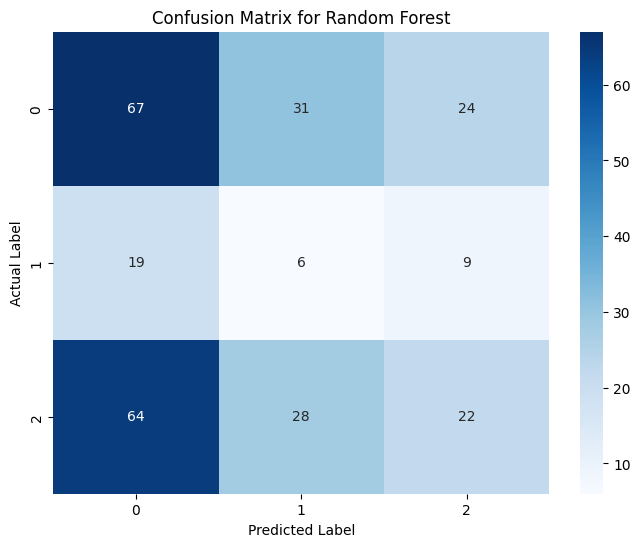

Random Forest Accuracy: 0.35185185185185186


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Check the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Naive Bayes Classifier

Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.46      0.45      0.46       122
           0       0.09      0.18      0.12        34
           1       0.37      0.28      0.32       114

    accuracy                           0.34       270
   macro avg       0.31      0.30      0.30       270
weighted avg       0.38      0.34      0.36       270



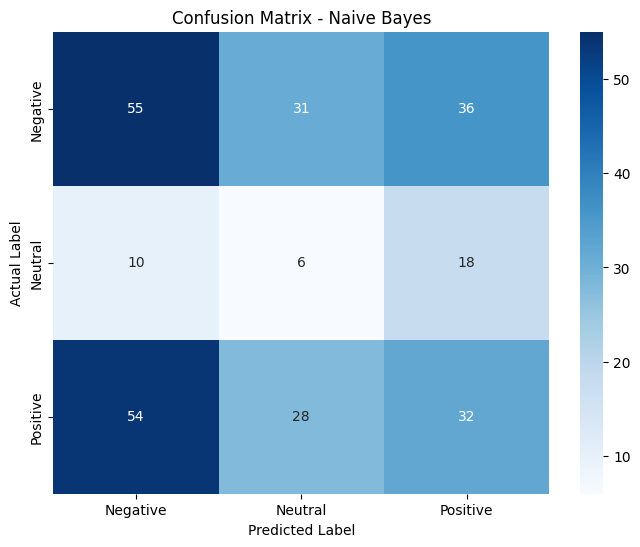

Naive Bayes Accuracy: 34.44%


In [34]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

print(f'Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%')

Support Vector Machine (SVM)

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.55      0.49       122
           0       0.09      0.18      0.12        34
           1       0.40      0.19      0.26       114

    accuracy                           0.35       270
   macro avg       0.31      0.31      0.29       270
weighted avg       0.38      0.35      0.35       270



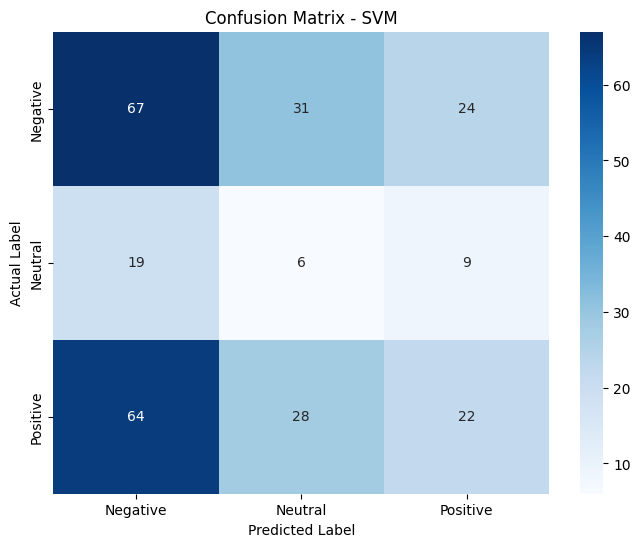

SVM Accuracy: 35.19%


In [27]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - SVM')
plt.show()

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.45      0.55      0.49       122
           0       0.09      0.18      0.12        34
           1       0.40      0.19      0.26       114

    accuracy                           0.35       270
   macro avg       0.31      0.31      0.29       270
weighted avg       0.38      0.35      0.35       270



# Analysis the test data:

In [ ]:
# Create a DataFrame using the test set (X_test)
analysis_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

# Add the actual sentiment labels (y_test) and predicted sentiment labels (y_pred)
analysis_df['y_test'] = y_test.values
analysis_df['y_pred'] = y_pred

# Save the analysis results to a CSV file
analysis_df.to_csv(r"C:\Users\viren\OneDrive\Desktop\IIT-MADARAS(GUVI)\Sentiment Analysis HealthCare\NLP-Sentiment-Analysis-on-Healthcare-Reviews\analysis.csv", index=False)

print("Analysis results saved to analysis.csv")


Analysis results saved to analysis.csv


# Model Evaluation

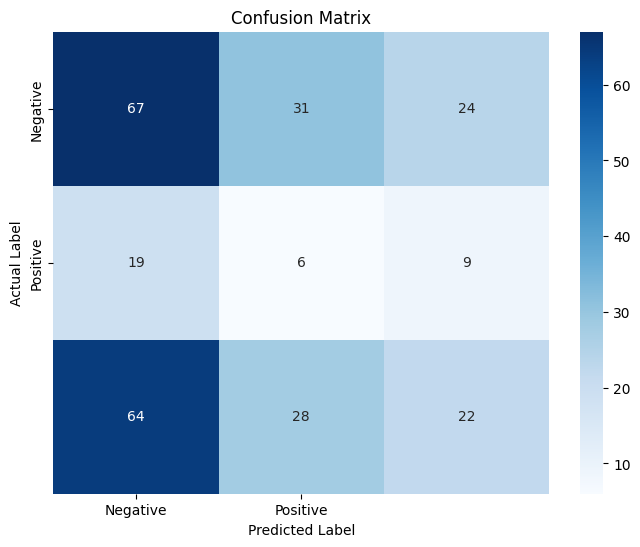

Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.55      0.49       122
           0       0.09      0.18      0.12        34
           1       0.40      0.19      0.26       114

    accuracy                           0.35       270
   macro avg       0.31      0.31      0.29       270
weighted avg       0.38      0.35      0.35       270



In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Sentiment Distribution

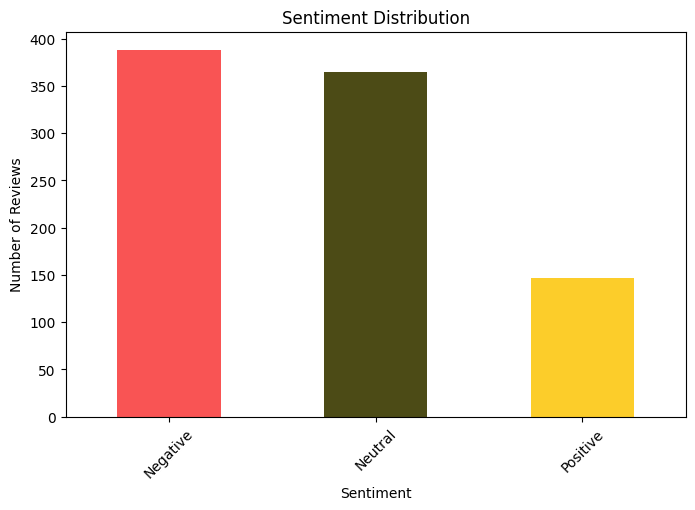

In [ ]:
# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.index = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['#F95454', '#4C4B16', '#FCCD2A'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.show()

# Visualization of Results

Unique Sentiment Values: [1 0 -1]


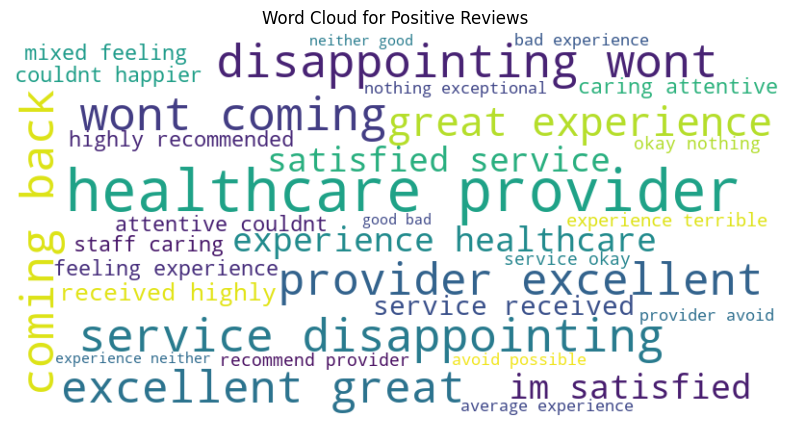

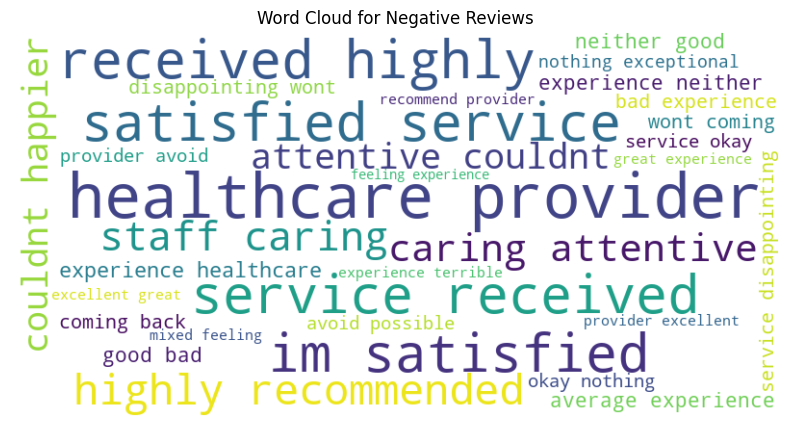

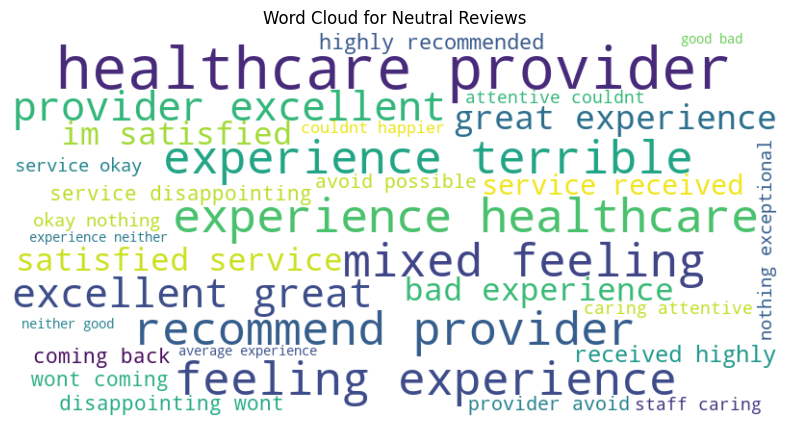

In [ ]:
from wordcloud import WordCloud


# Ensure the sentiment mapping is correct
df.loc[df['Rating'] > 3, 'Sentiment'] = 1
df.loc[df['Rating'] == 3, 'Sentiment'] = 0
df.loc[df['Rating'] < 3, 'Sentiment'] = -1

# Check the unique values in the Sentiment column
print("Unique Sentiment Values:", df['Sentiment'].unique())

# Join positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 1]['cleaned_review'])
negative_reviews = ' '.join(df[df['Sentiment'] == -1]['cleaned_review'])
neutral_reviews = ' '.join(df[df['Sentiment'] == 0]['cleaned_review'])

# Check if there are reviews to generate word clouds
if positive_reviews:
    # Word Cloud for Positive Sentiments
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Reviews')
    plt.show()


if negative_reviews:
    # Word Cloud for Negative Sentiments
    wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Reviews')
    plt.show()


if neutral_reviews:
    # Word Cloud for Neutral Sentiments
    wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')

    plt.axis('off')
    plt.title('Word Cloud for Neutral Reviews')
    plt.show()



## "Dataset Imbalance and Complexity: Factors Influencing Sentiment Model Performance"


## Faults from the Dataset Affecting Model Performance:

# Class Imbalance: 
The dataset contains significantly fewer neutral reviews (147 neutral vs. 388 positive and 365 negative). This imbalance causes the models to focus on the more prevalent classes (positive and negative), leading to poor performance in predicting the minority class (neutral). Class imbalance makes it difficult for models to learn an even representation across all categories.

# Limited Dataset Size:
With only 900 samples, the dataset is relatively small for training machine learning models, especially in a task as nuanced as sentiment analysis. Small datasets can cause models to overfit to the training data and struggle with generalizing to new, unseen examples.

# Simple Sentiment Labeling: 
The sentiment labels are assigned based on numerical ratings (positive, neutral, negative) but may not fully capture the complex emotions and sentiments expressed in the reviews. For instance, a review might have subtle tones of sarcasm, ambiguity, or mixed sentiment, which the label might not fully represent, causing confusion for the models.

# Text Complexity and Ambiguity: 
Sentiment analysis requires understanding context, nuances, and variations in language. The dataset's reviews might contain complex sentences, medical jargon, or mixed sentiment, making it harder for the models to discern clear sentiment using basic feature extraction methods like TF-IDF, which might not capture deeper semantic meaning.

These dataset issues—class imbalance, limited size, simplified labeling, and text complexity—are key factors contributing to the underperformance of the models.